#### 예측에 도움이 되는 경우

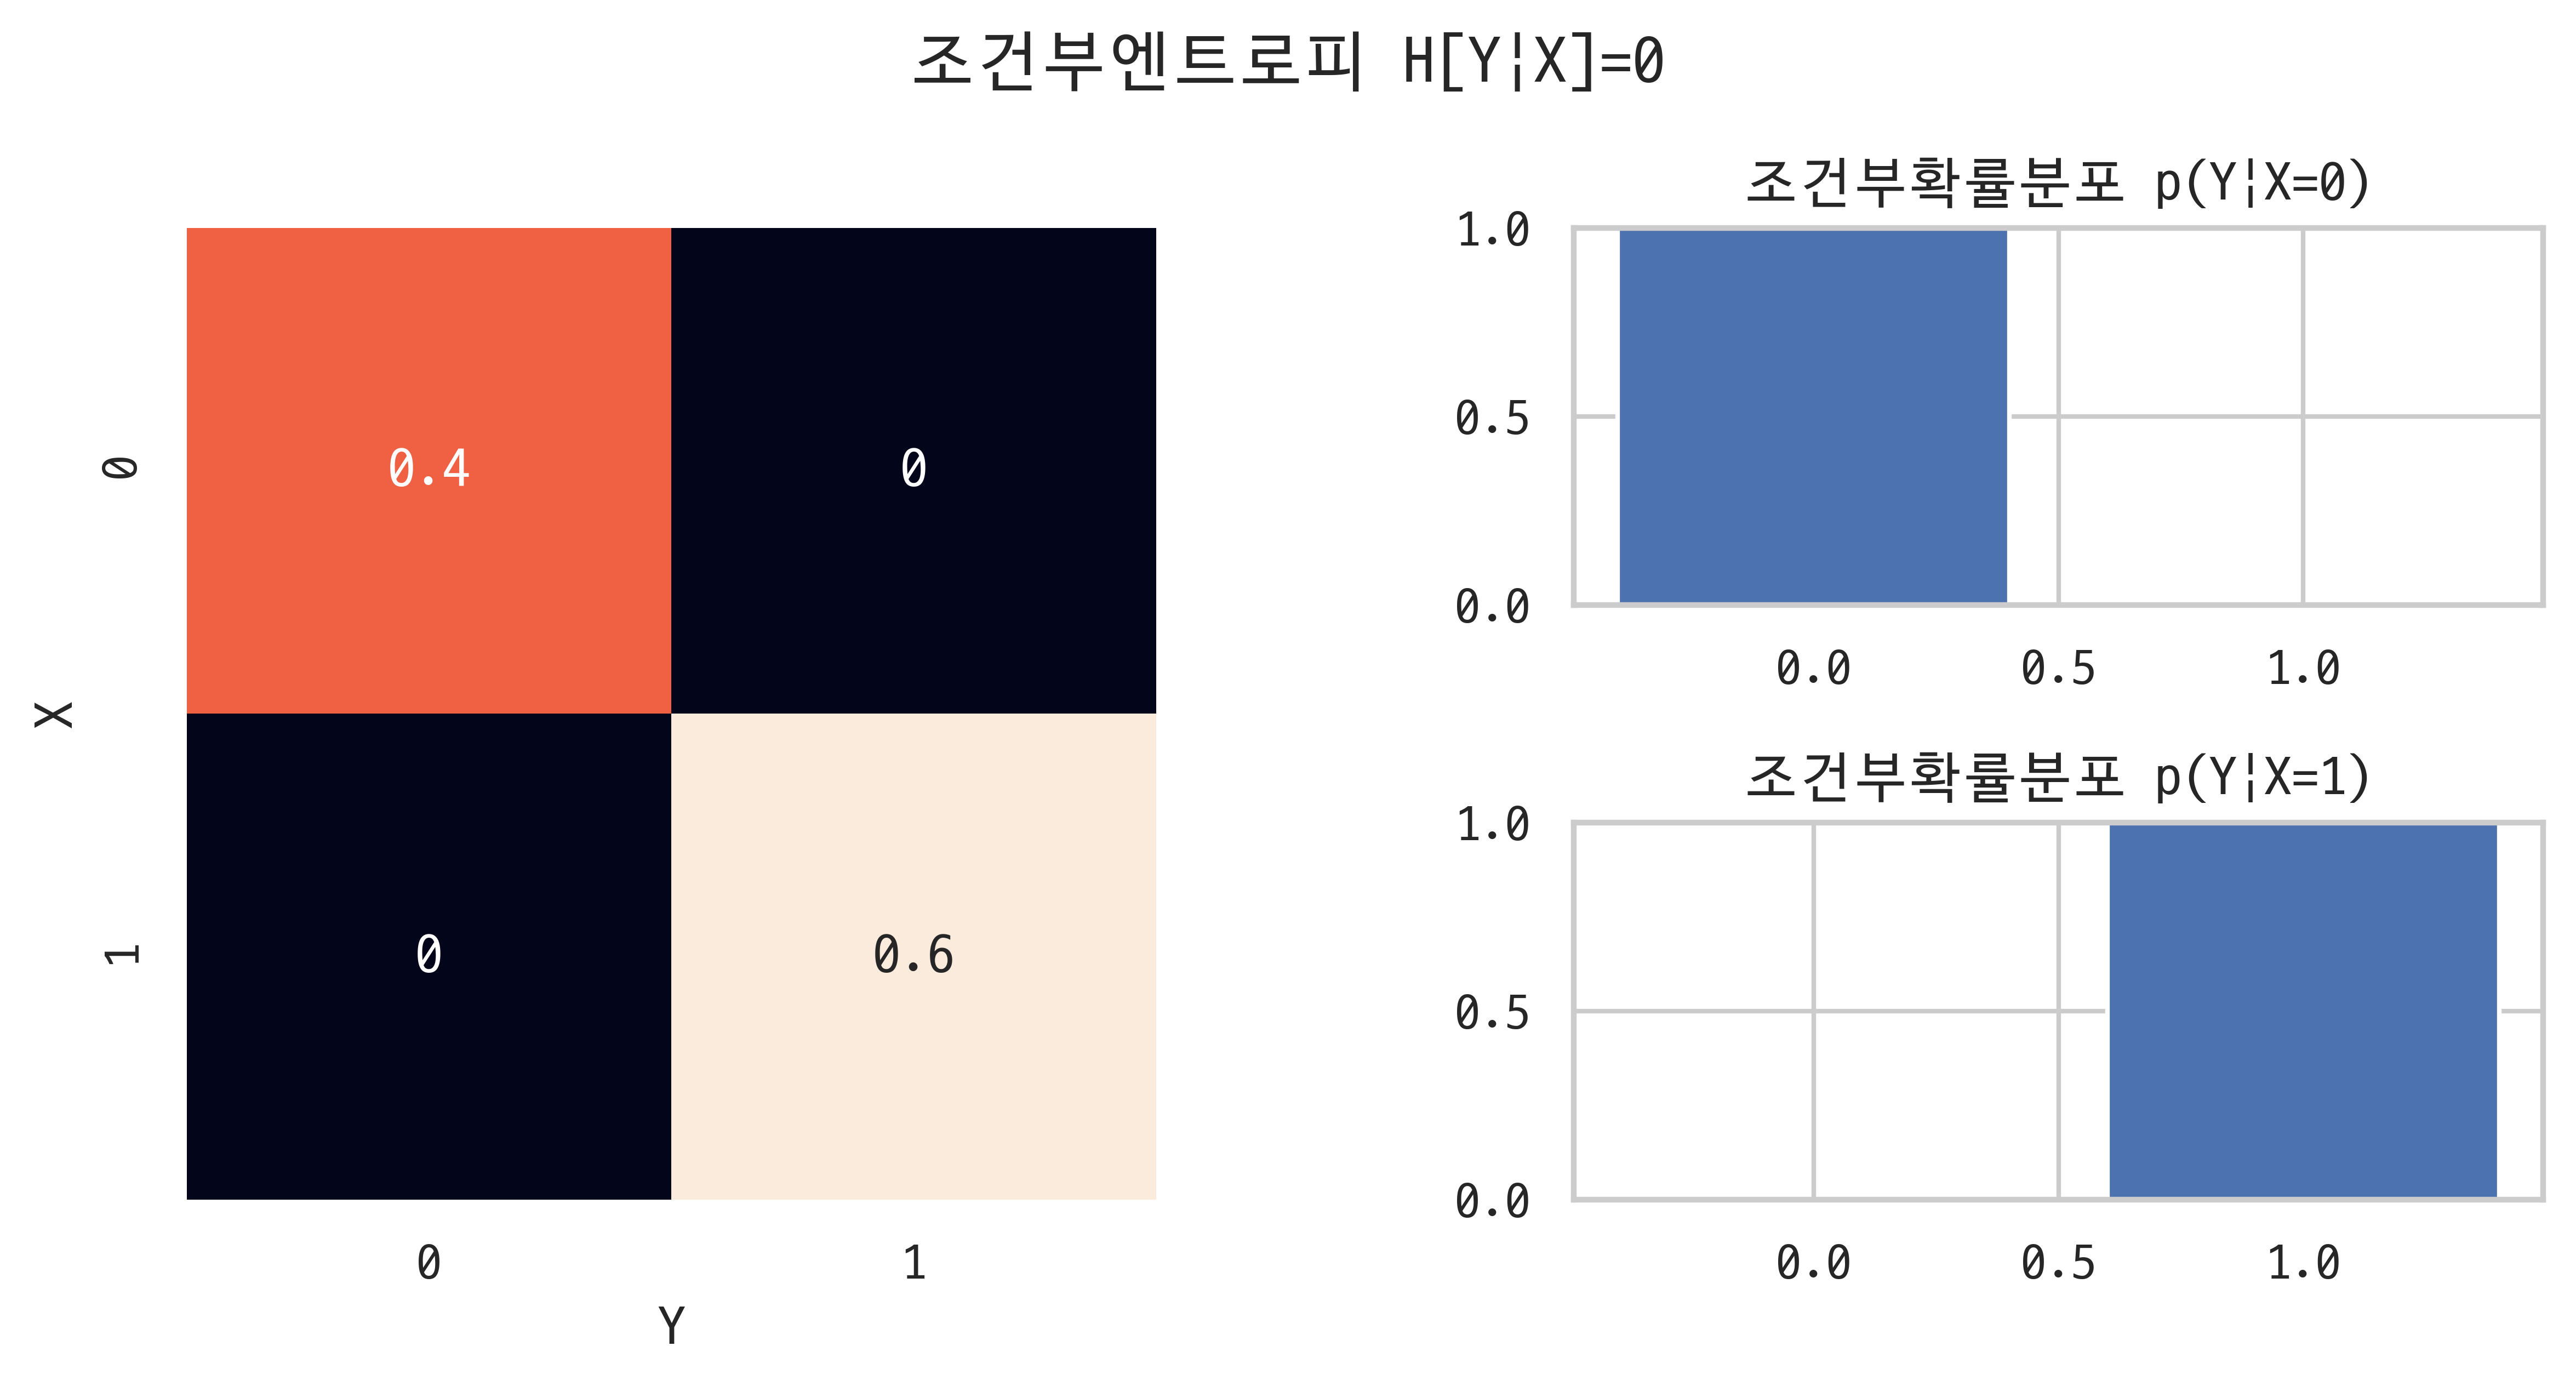

In [1]:
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
pXY = [[0.4, 0], [0, 0.6]]
sns.heatmap(pXY, annot=True, cbar=False)
plt.xlabel("Y")
plt.ylabel("X")

plt.subplot(222)
plt.bar([0, 1], [1, 0])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=0)")

plt.subplot(224)
plt.bar([0, 1], [0, 1])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=1)")

plt.tight_layout(w_pad=5)
plt.suptitle("조건부엔트로피 H[Y|X]=0", y=1.05)
plt.show()

#### 예측에 도움이 되지 않는 경우

In [2]:
sp.stats.entropy([1/3, 2/3], base=2)

0.9182958340544894

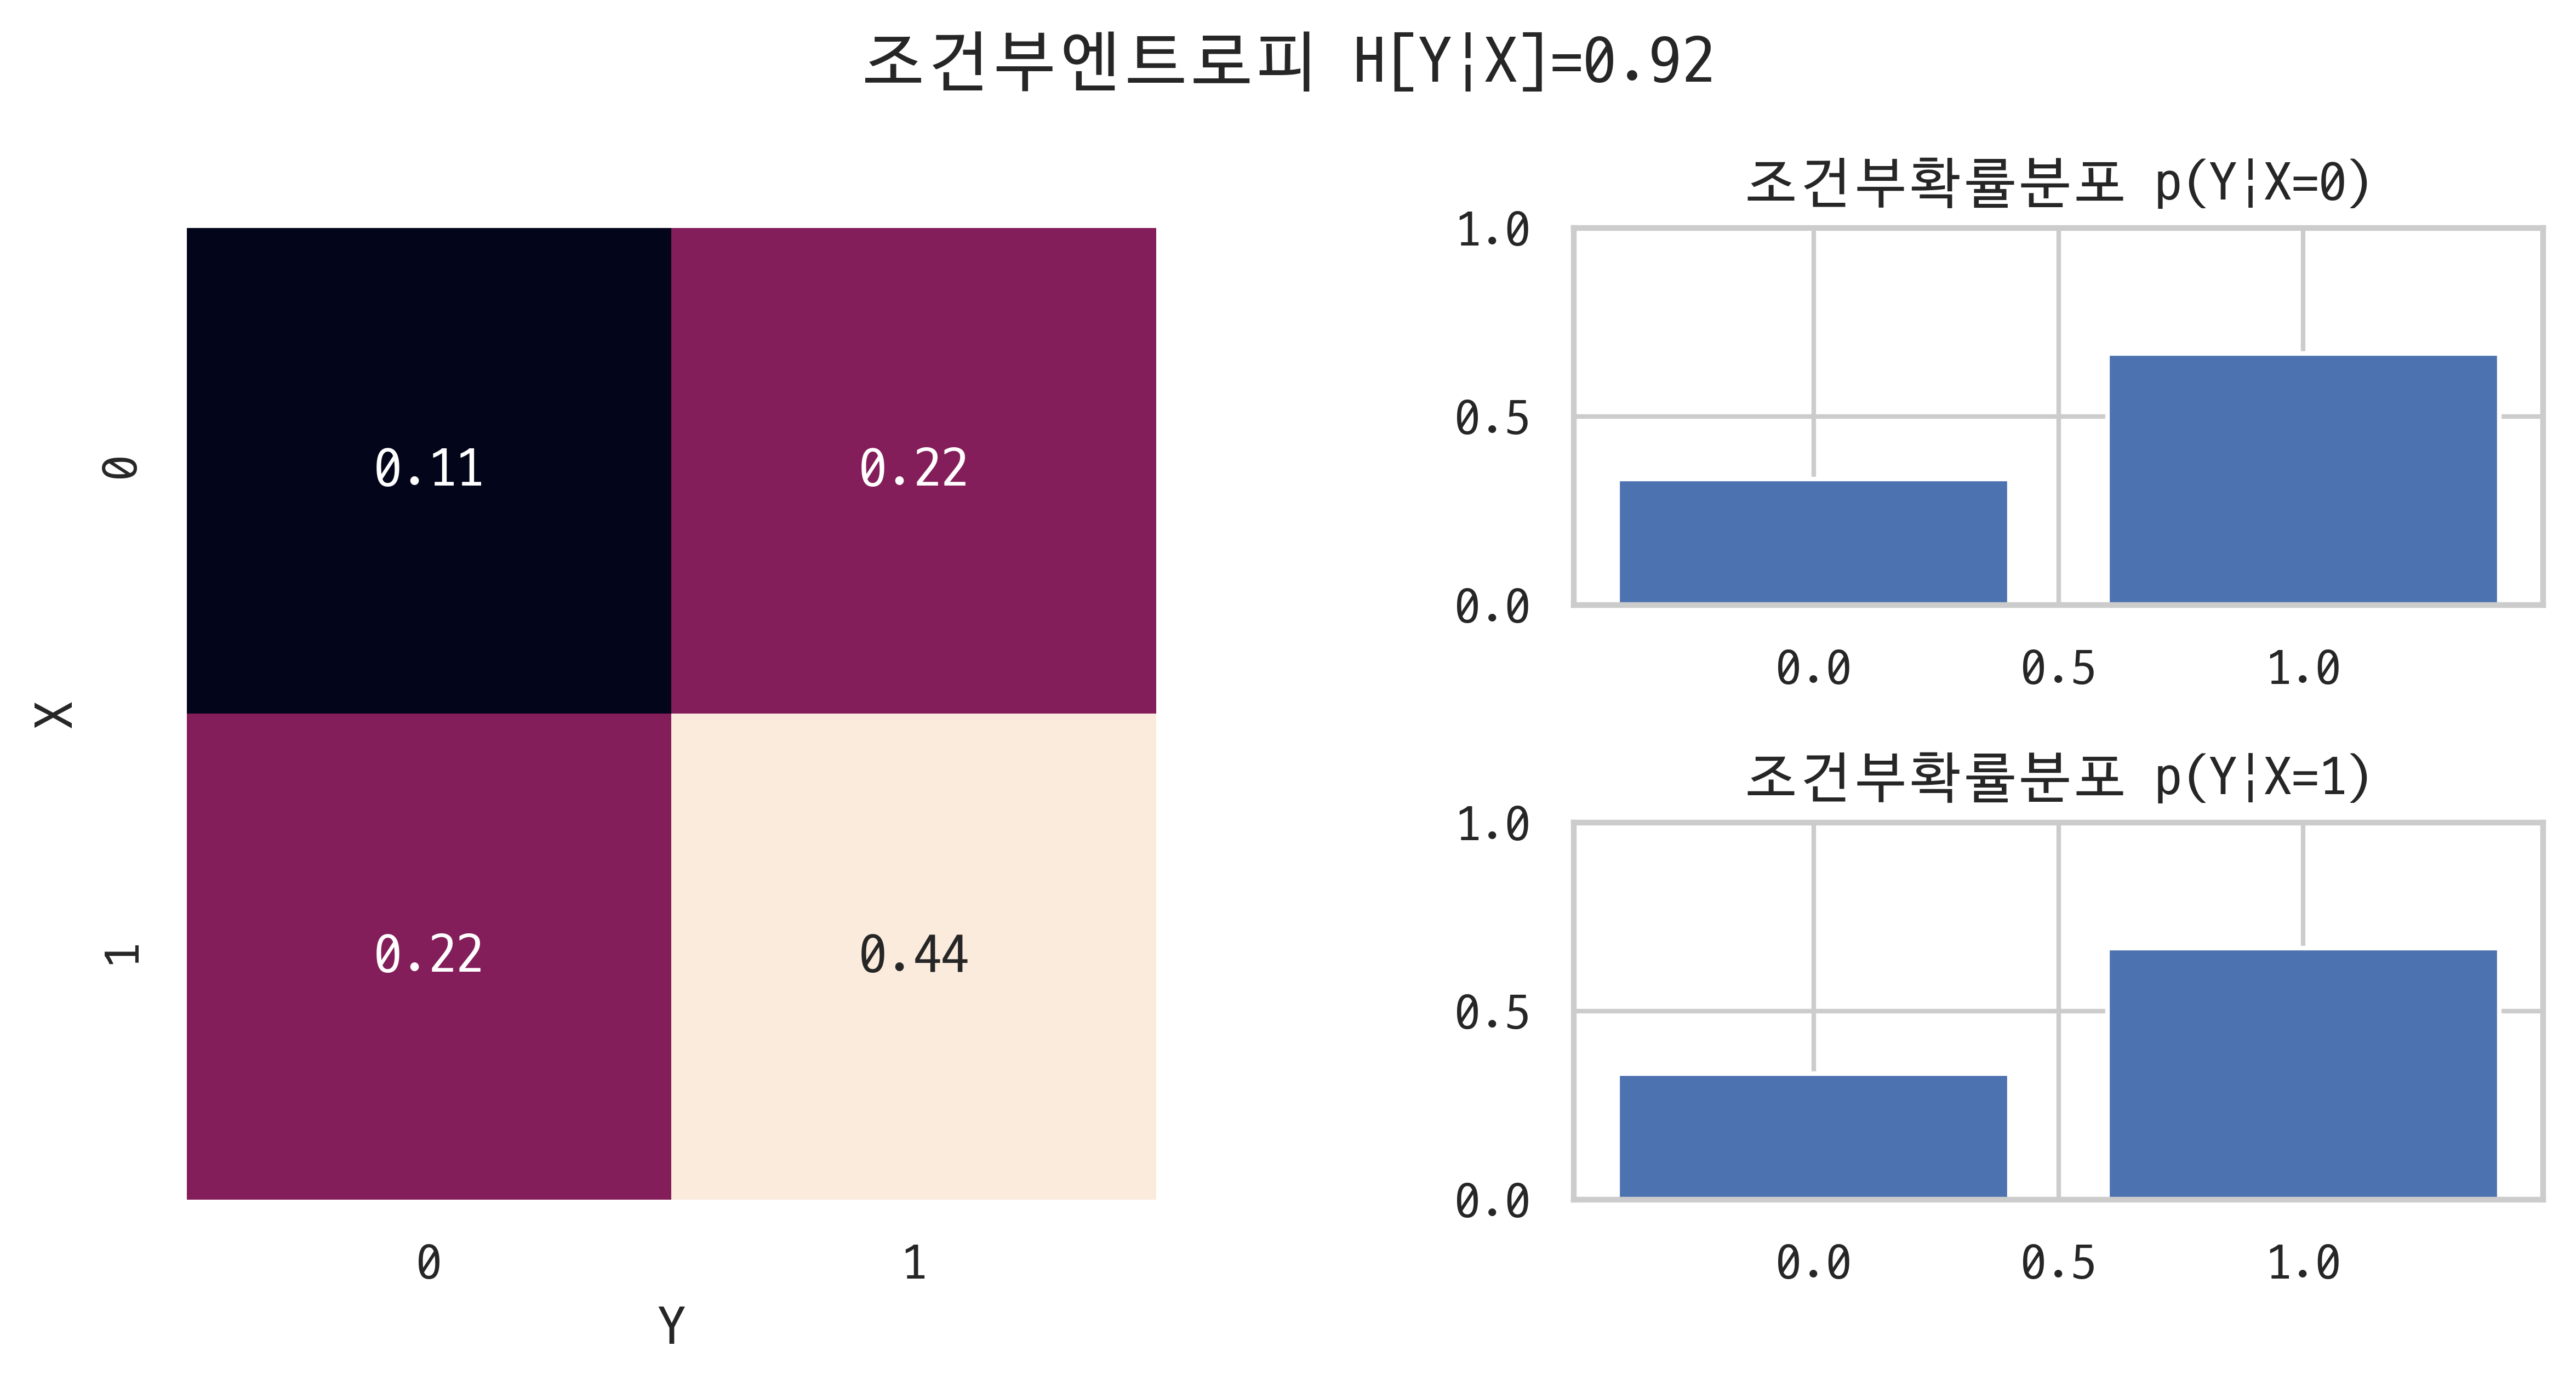

In [3]:
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
pXY = [[1/9, 2/9], [2/9, 4/9]]
sns.heatmap(pXY, annot=True, cbar=False)
plt.xlabel("Y")
plt.ylabel("X")

plt.subplot(222)
plt.bar([0, 1], [1/3, 2/3])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=0)")

plt.subplot(224)
plt.bar([0, 1], [1/3, 2/3])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=1)")

plt.tight_layout(w_pad=5)
plt.suptitle("조건부엔트로피 H[Y|X]=0.92", y=1.05)
plt.show()

#### 조건부엔트로피를 사용한 붓꽃 분류문제

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X = iris.data[idx, :]
Y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


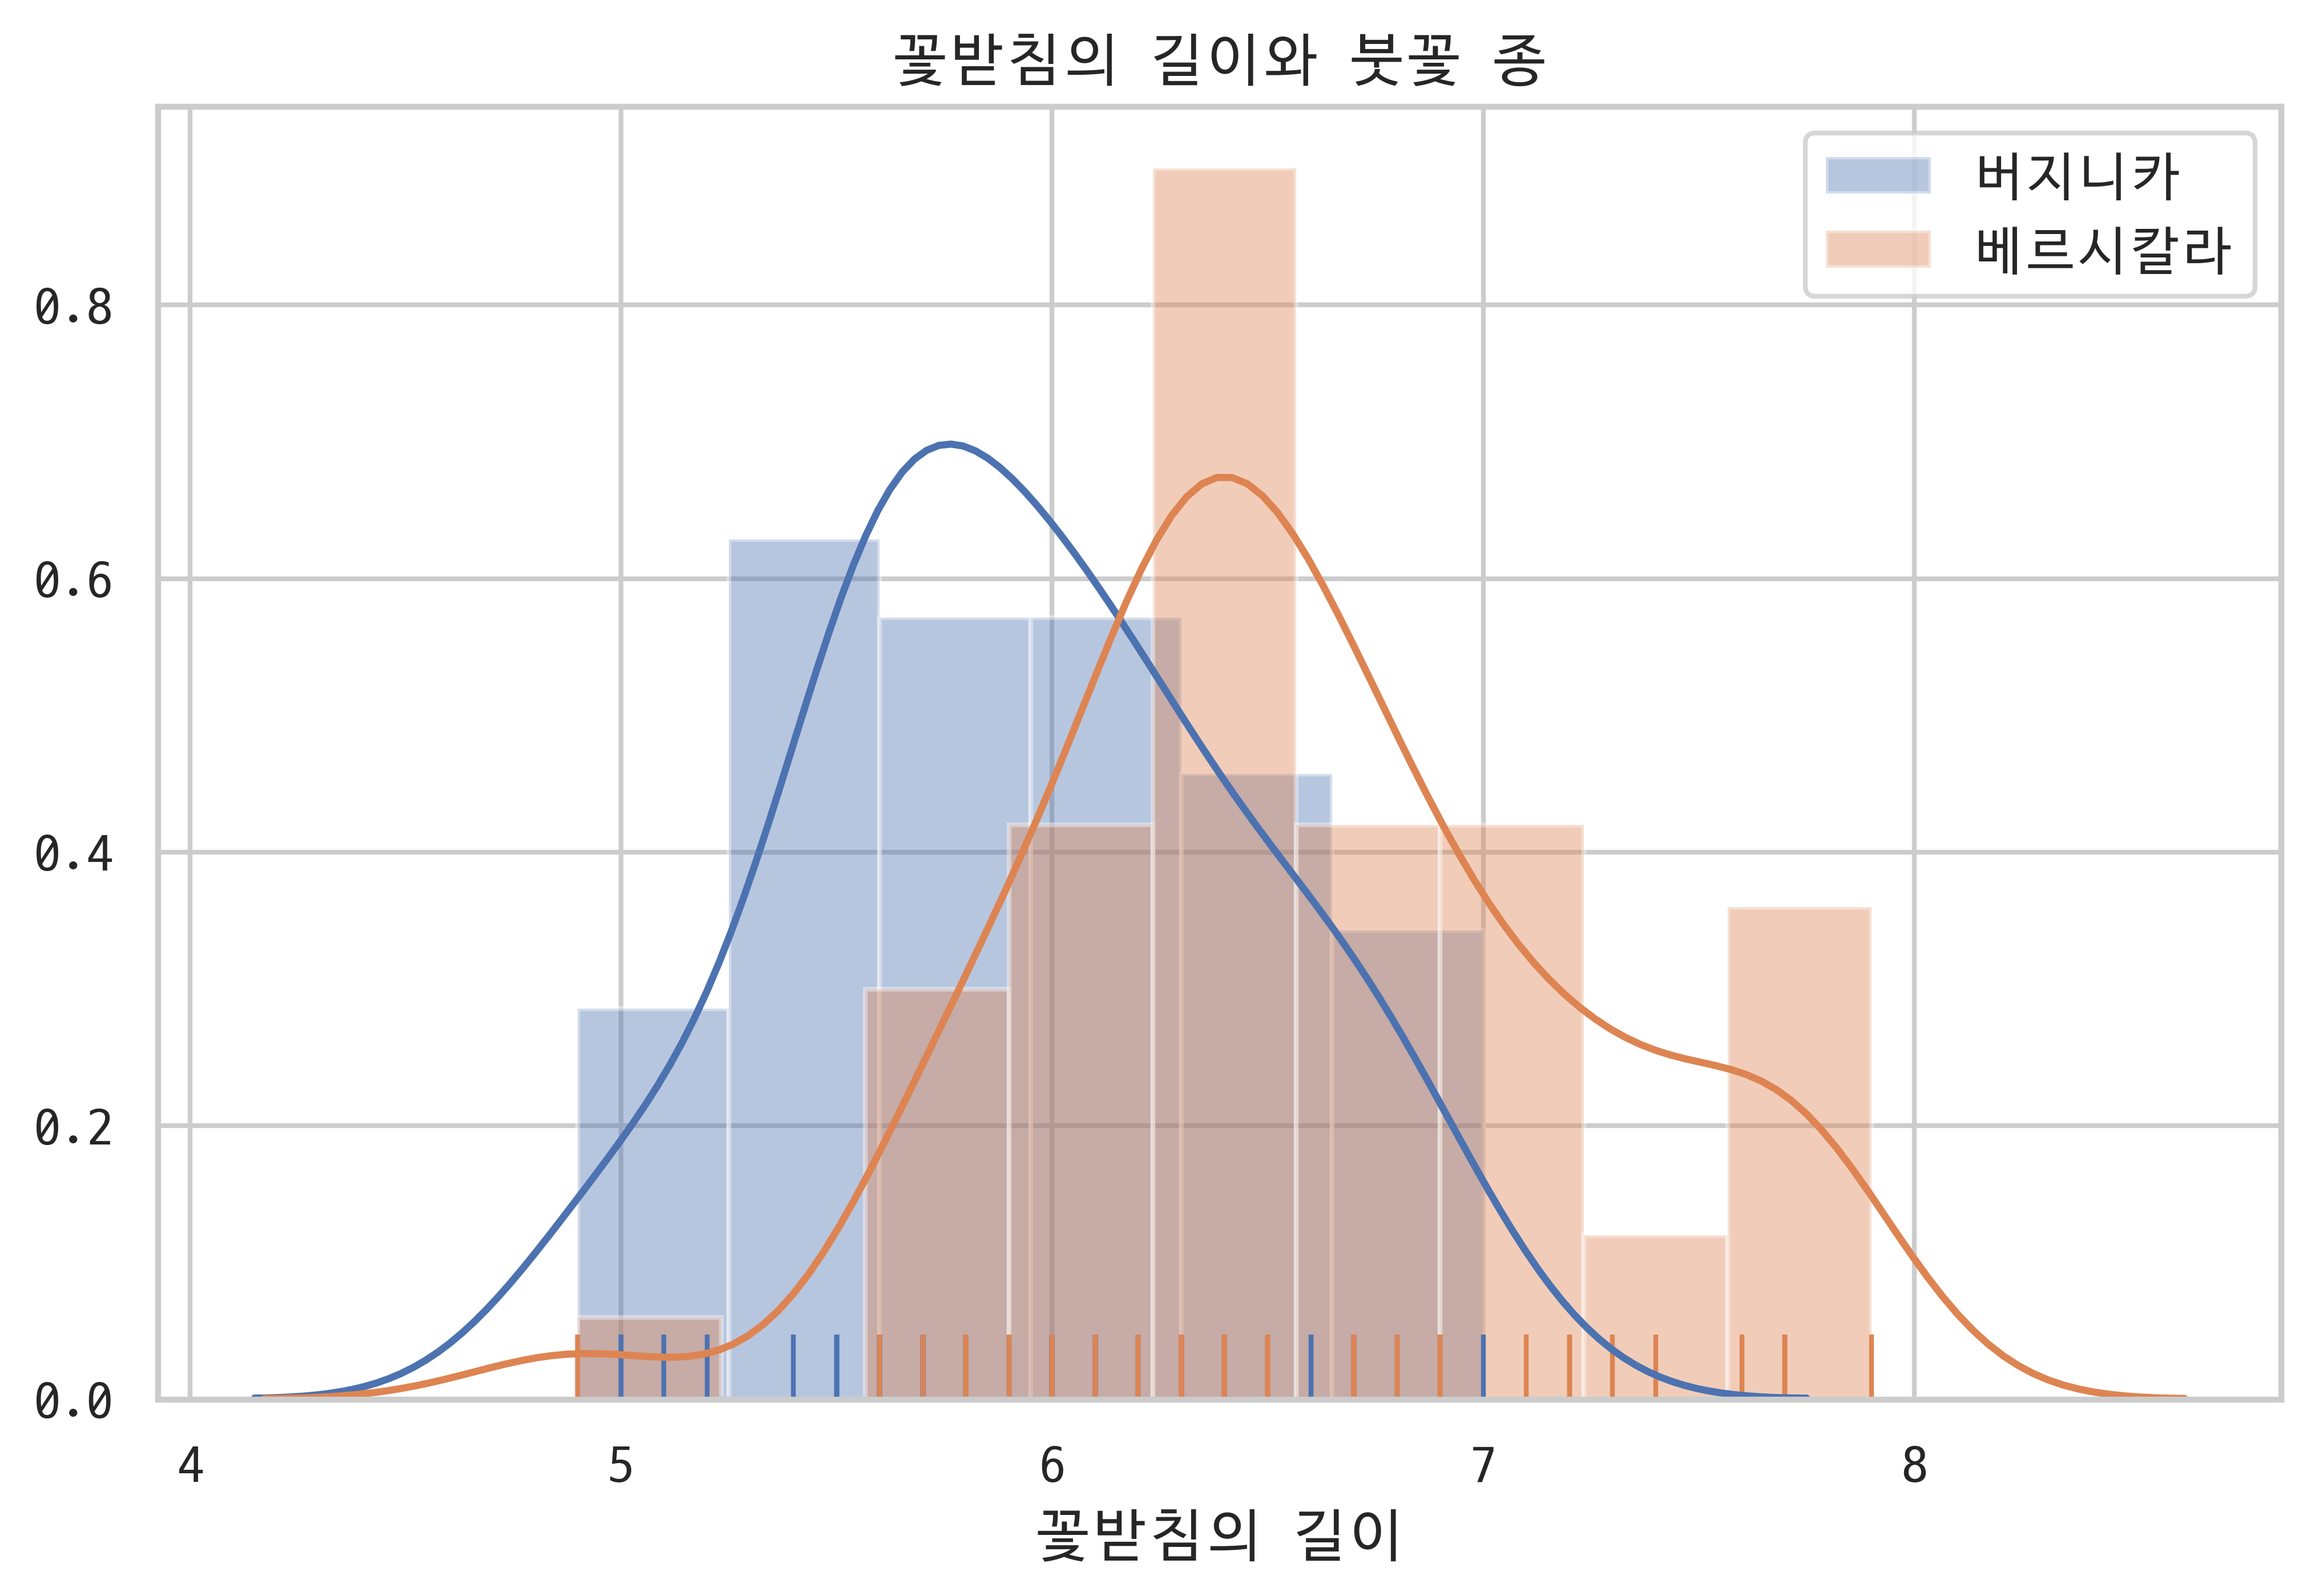

In [16]:
sns.distplot(df[df.species == 1]["sepal length (cm)"], hist=True, rug=True, label="버지니카")
sns.distplot(df[df.species == 2]["sepal length (cm)"], hist=True, rug=True, label="베르시칼라")
plt.xlabel("꽃받침의 길이")
plt.legend()
plt.title("꽃받침의 길이와 붓꽃 종")
plt.show()

In [26]:
df["X1"] = df["sepal length (cm)"] > 6
pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)
pivot_table1

species,1,2
X1,,
False,30,9
True,20,41


In [27]:
def cond_entropy(v):
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

cond_entropy(pivot_table1.values)

0.860714271586387

In [29]:
df["X2"] = df["sepal length (cm)"] > 6.5
pivot_table2 = df.groupby(["X2", "species"]).size().unstack().fillna(0)
pivot_table2

species,1,2
X2,,
False,42,28
True,8,22


In [30]:
cond_entropy(pivot_table2.values)

0.9306576387006182

#### Ex. 10.2.1

In [183]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1, 2])
X = iris.data[idx, :]
Y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


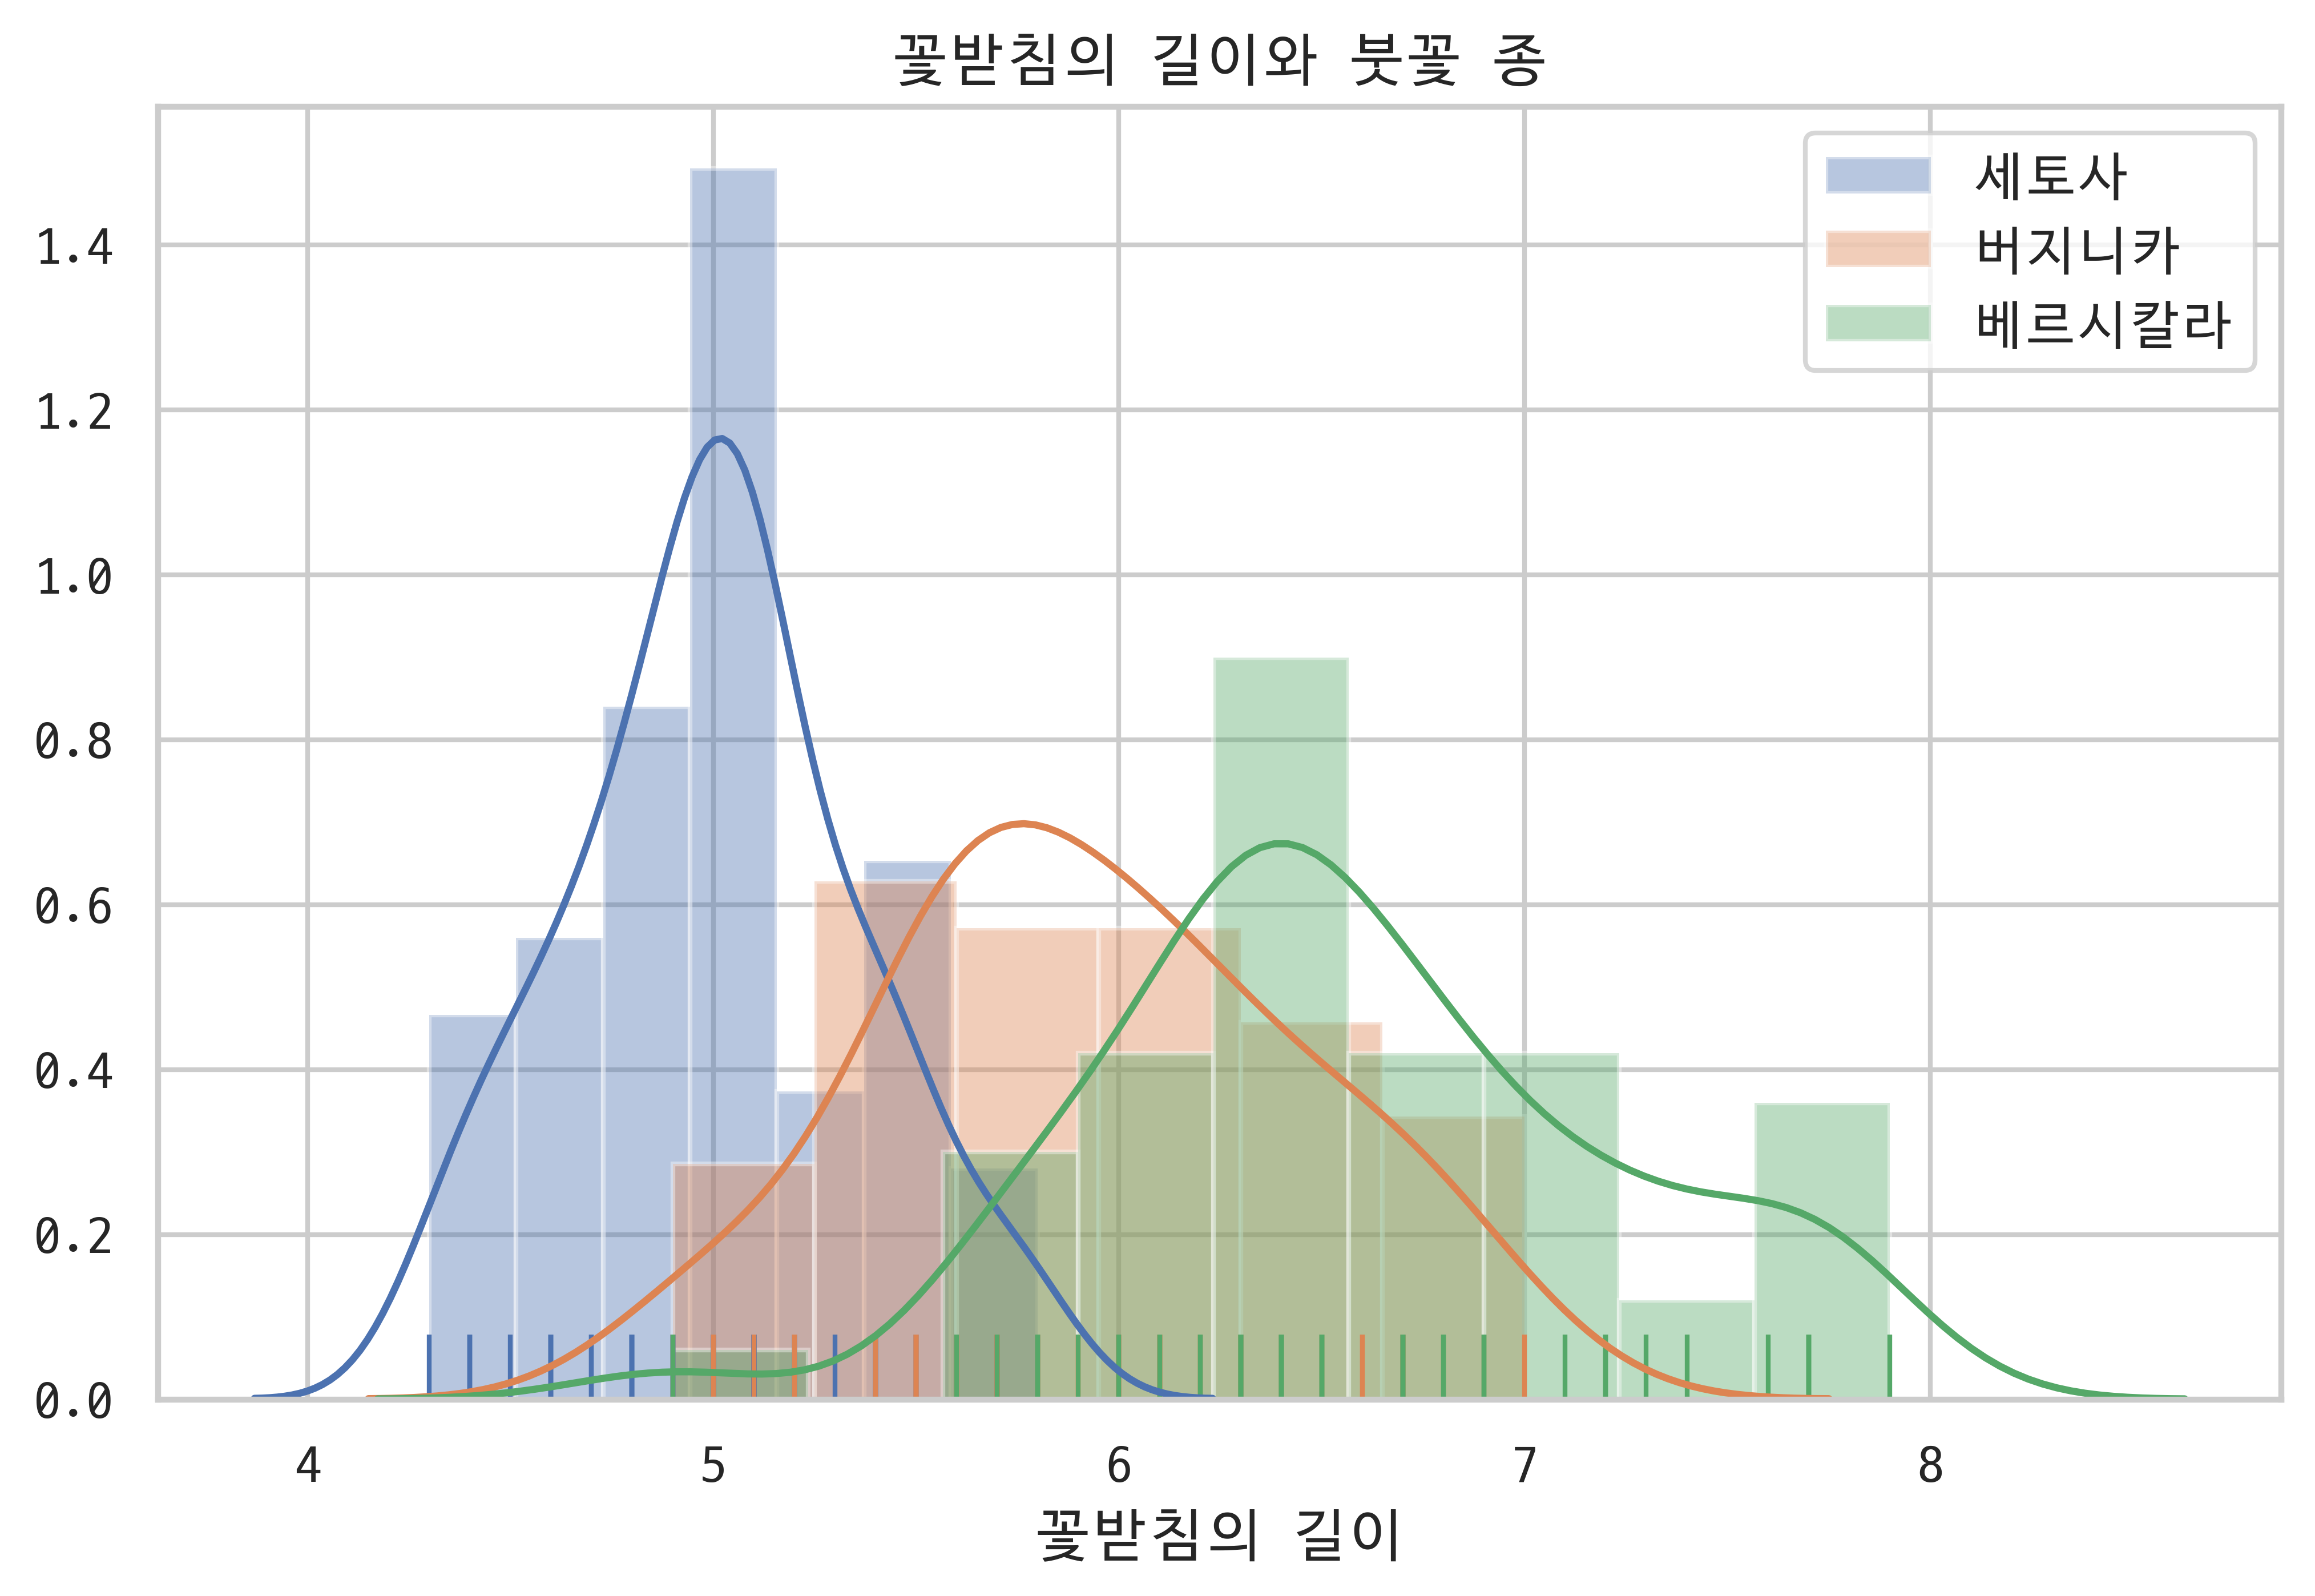

In [184]:
sns.distplot(df[df.species == 0]["sepal length (cm)"], hist=True, rug=True, label="세토사")
sns.distplot(df[df.species == 1]["sepal length (cm)"], hist=True, rug=True, label="버지니카")
sns.distplot(df[df.species == 2]["sepal length (cm)"], hist=True, rug=True, label="베르시칼라")
plt.xlabel("꽃받침의 길이")
plt.legend()
plt.title("꽃받침의 길이와 붓꽃 종")
plt.show()

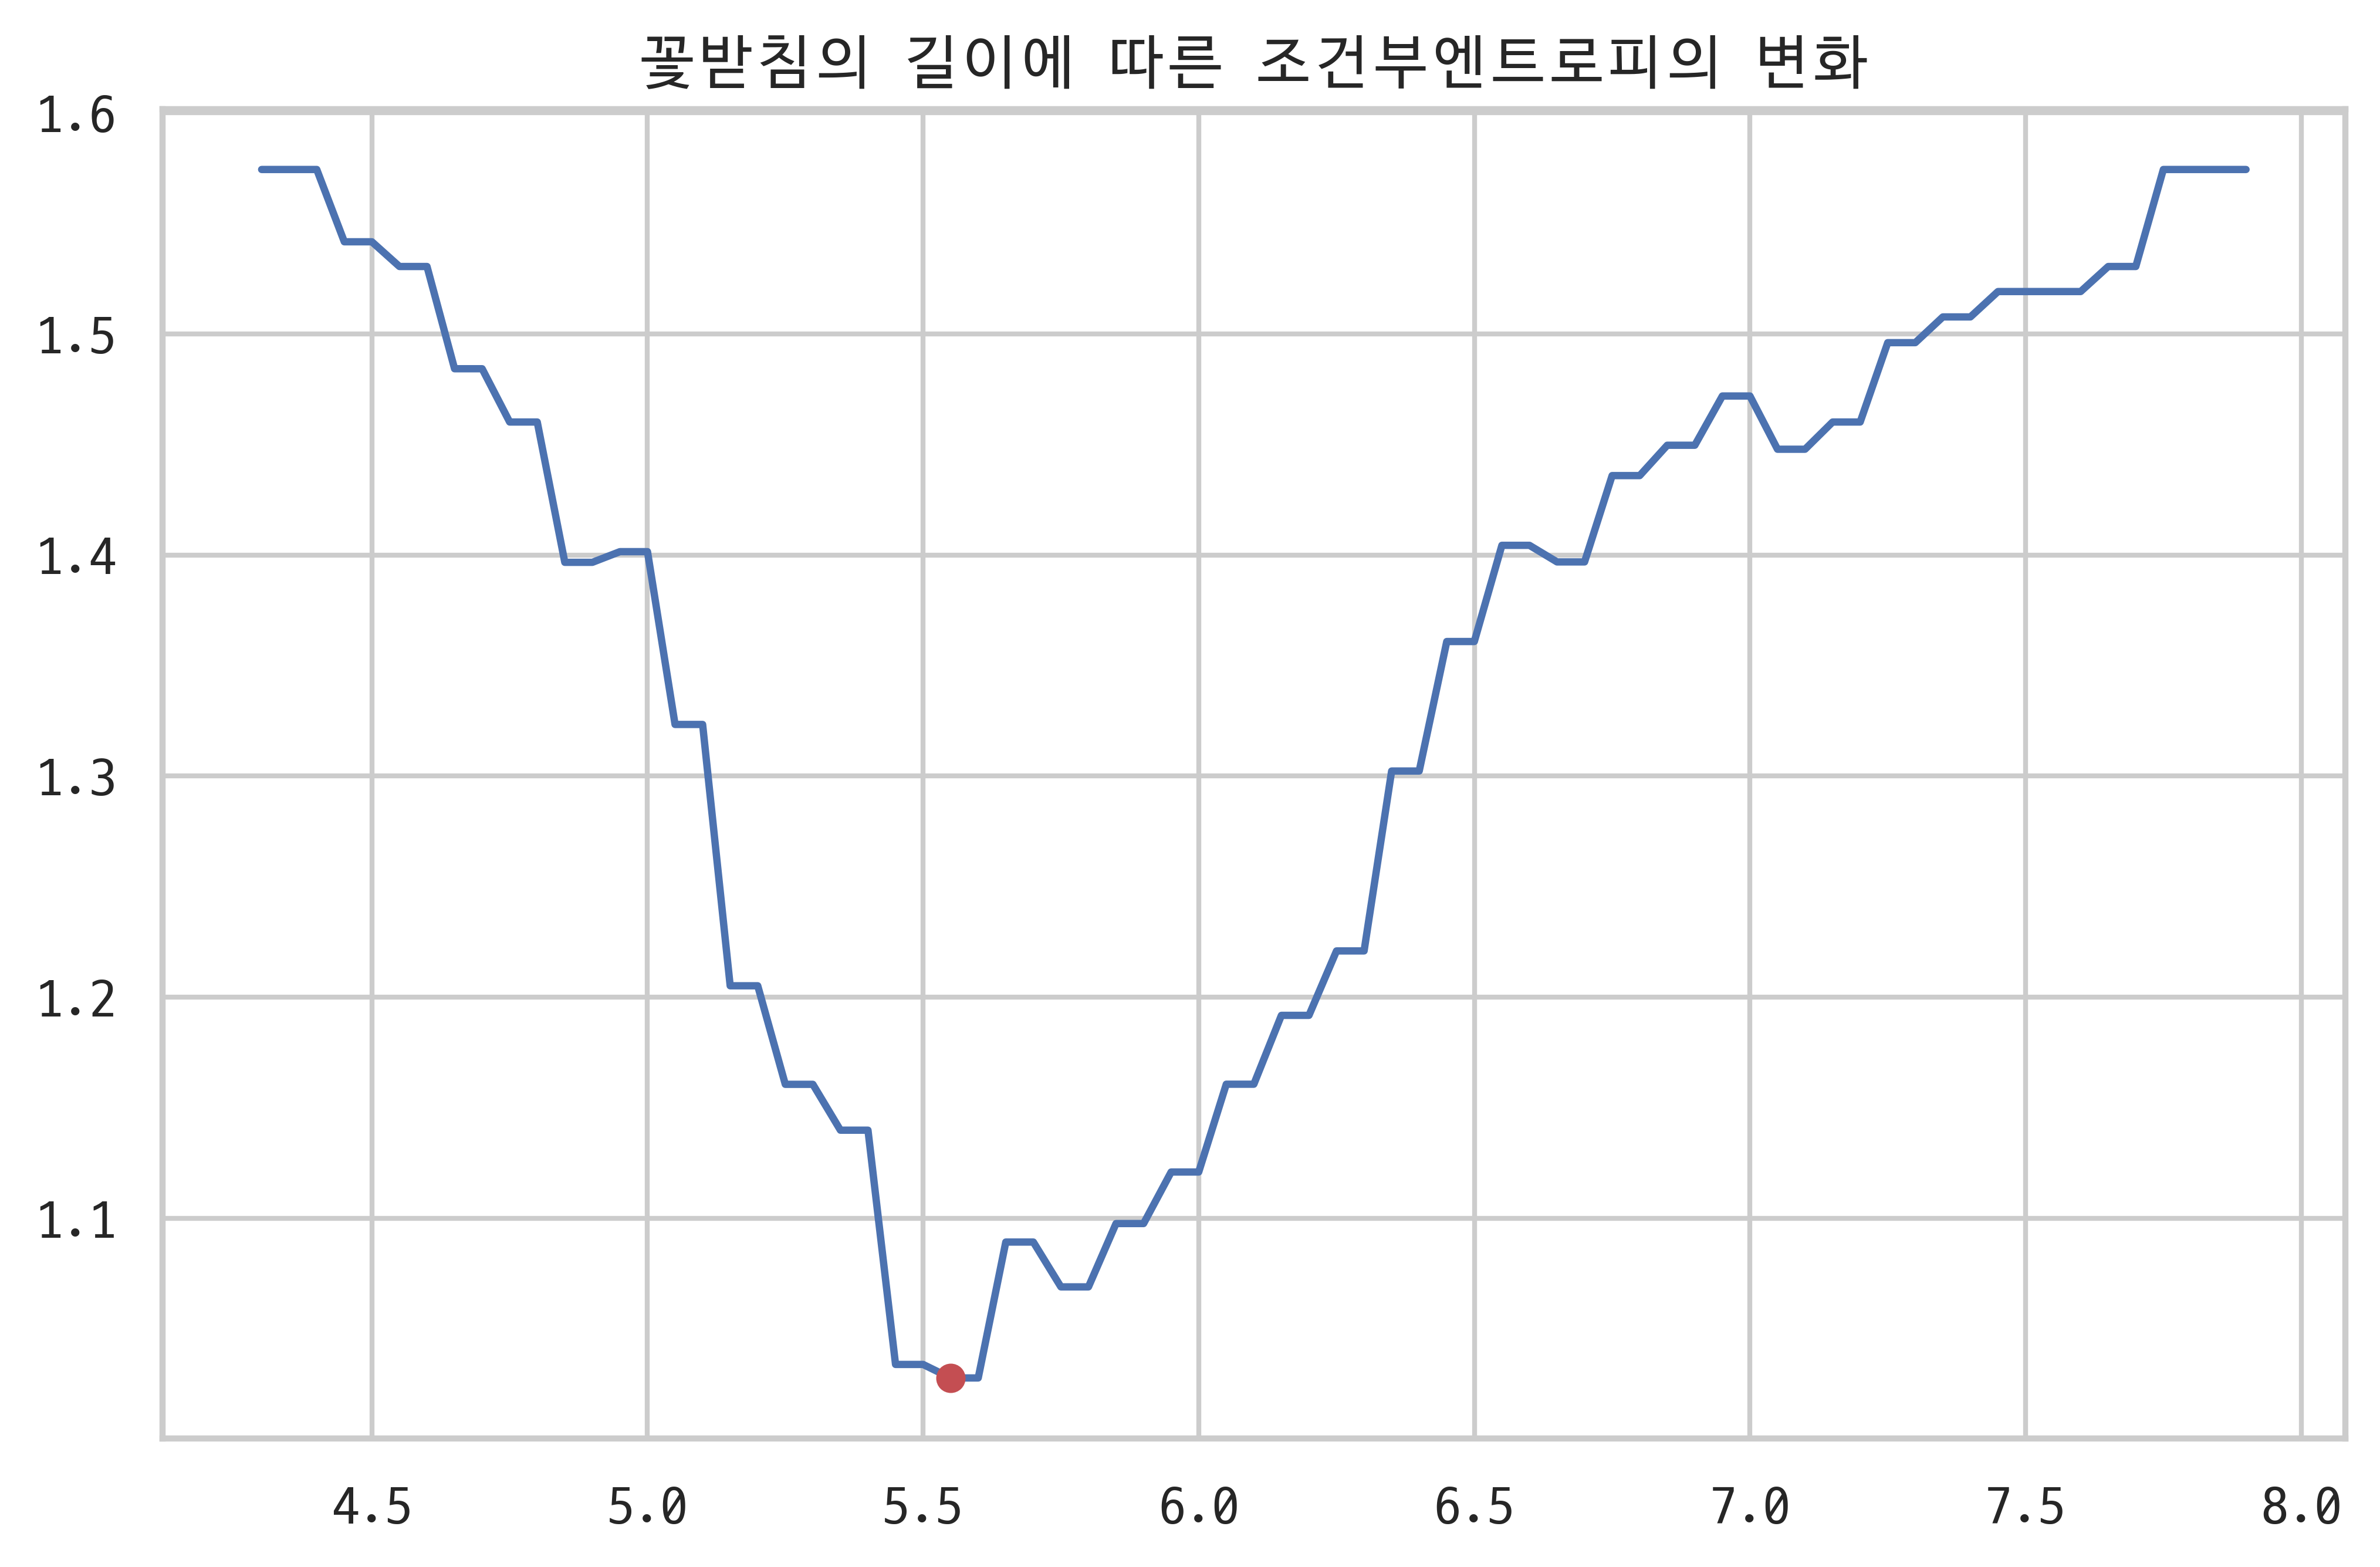

In [195]:
# (1)번 문제
sl_min_length, sl_max_length = min(df["sepal length (cm)"]), max(df["sepal length (cm)"])
sl_list = []
sl_entropy_list = []

for i, l in enumerate(np.arange(sl_min_length, sl_max_length + 0.05, 0.05)):
    df["X{}".format(i)] = df["sepal length (cm)"] > l
    entropy = cond_entropy(df.groupby(["X{}".format(i), "species"]).size().unstack().fillna(0).values)
    sl_list.append(l)
    sl_entropy_list.append(entropy)

plt.plot(sl_list, sl_entropy_list, ls="-")
plt.plot(5.55, min(sl_entropy_list), 'ro', ms=5)
plt.title("꽃받침의 길이에 따른 조건부엔트로피의 변화")
plt.show()

In [196]:
# (2)번 문제
min(sl_entropy_list)

1.0277298129142294

In [197]:
list(zip(sl_list, sl_entropy_list))
# answer: 5.55 cm

[(4.3, 1.574331388064963),
 (4.35, 1.574331388064963),
 (4.3999999999999995, 1.574331388064963),
 (4.449999999999999, 1.541632777602583),
 (4.499999999999999, 1.541632777602583),
 (4.549999999999999, 1.5304520649323845),
 (4.599999999999999, 1.5304520649323845),
 (4.649999999999999, 1.4842099301427731),
 (4.699999999999998, 1.4842099301427731),
 (4.749999999999998, 1.4601100239697826),
 (4.799999999999998, 1.4601100239697826),
 (4.849999999999998, 1.3966439729423832),
 (4.899999999999998, 1.3966439729423832),
 (4.9499999999999975, 1.4014710074715153),
 (4.999999999999997, 1.4014710074715153),
 (5.049999999999997, 1.323314003362708),
 (5.099999999999997, 1.323314003362708),
 (5.149999999999997, 1.205112148593526),
 (5.199999999999997, 1.205112148593526),
 (5.2499999999999964, 1.1605394811881529),
 (5.299999999999996, 1.1605394811881529),
 (5.349999999999996, 1.1397957583334044),
 (5.399999999999996, 1.1397957583334044),
 (5.449999999999996, 1.0338390111422788),
 (5.499999999999996, 1.03

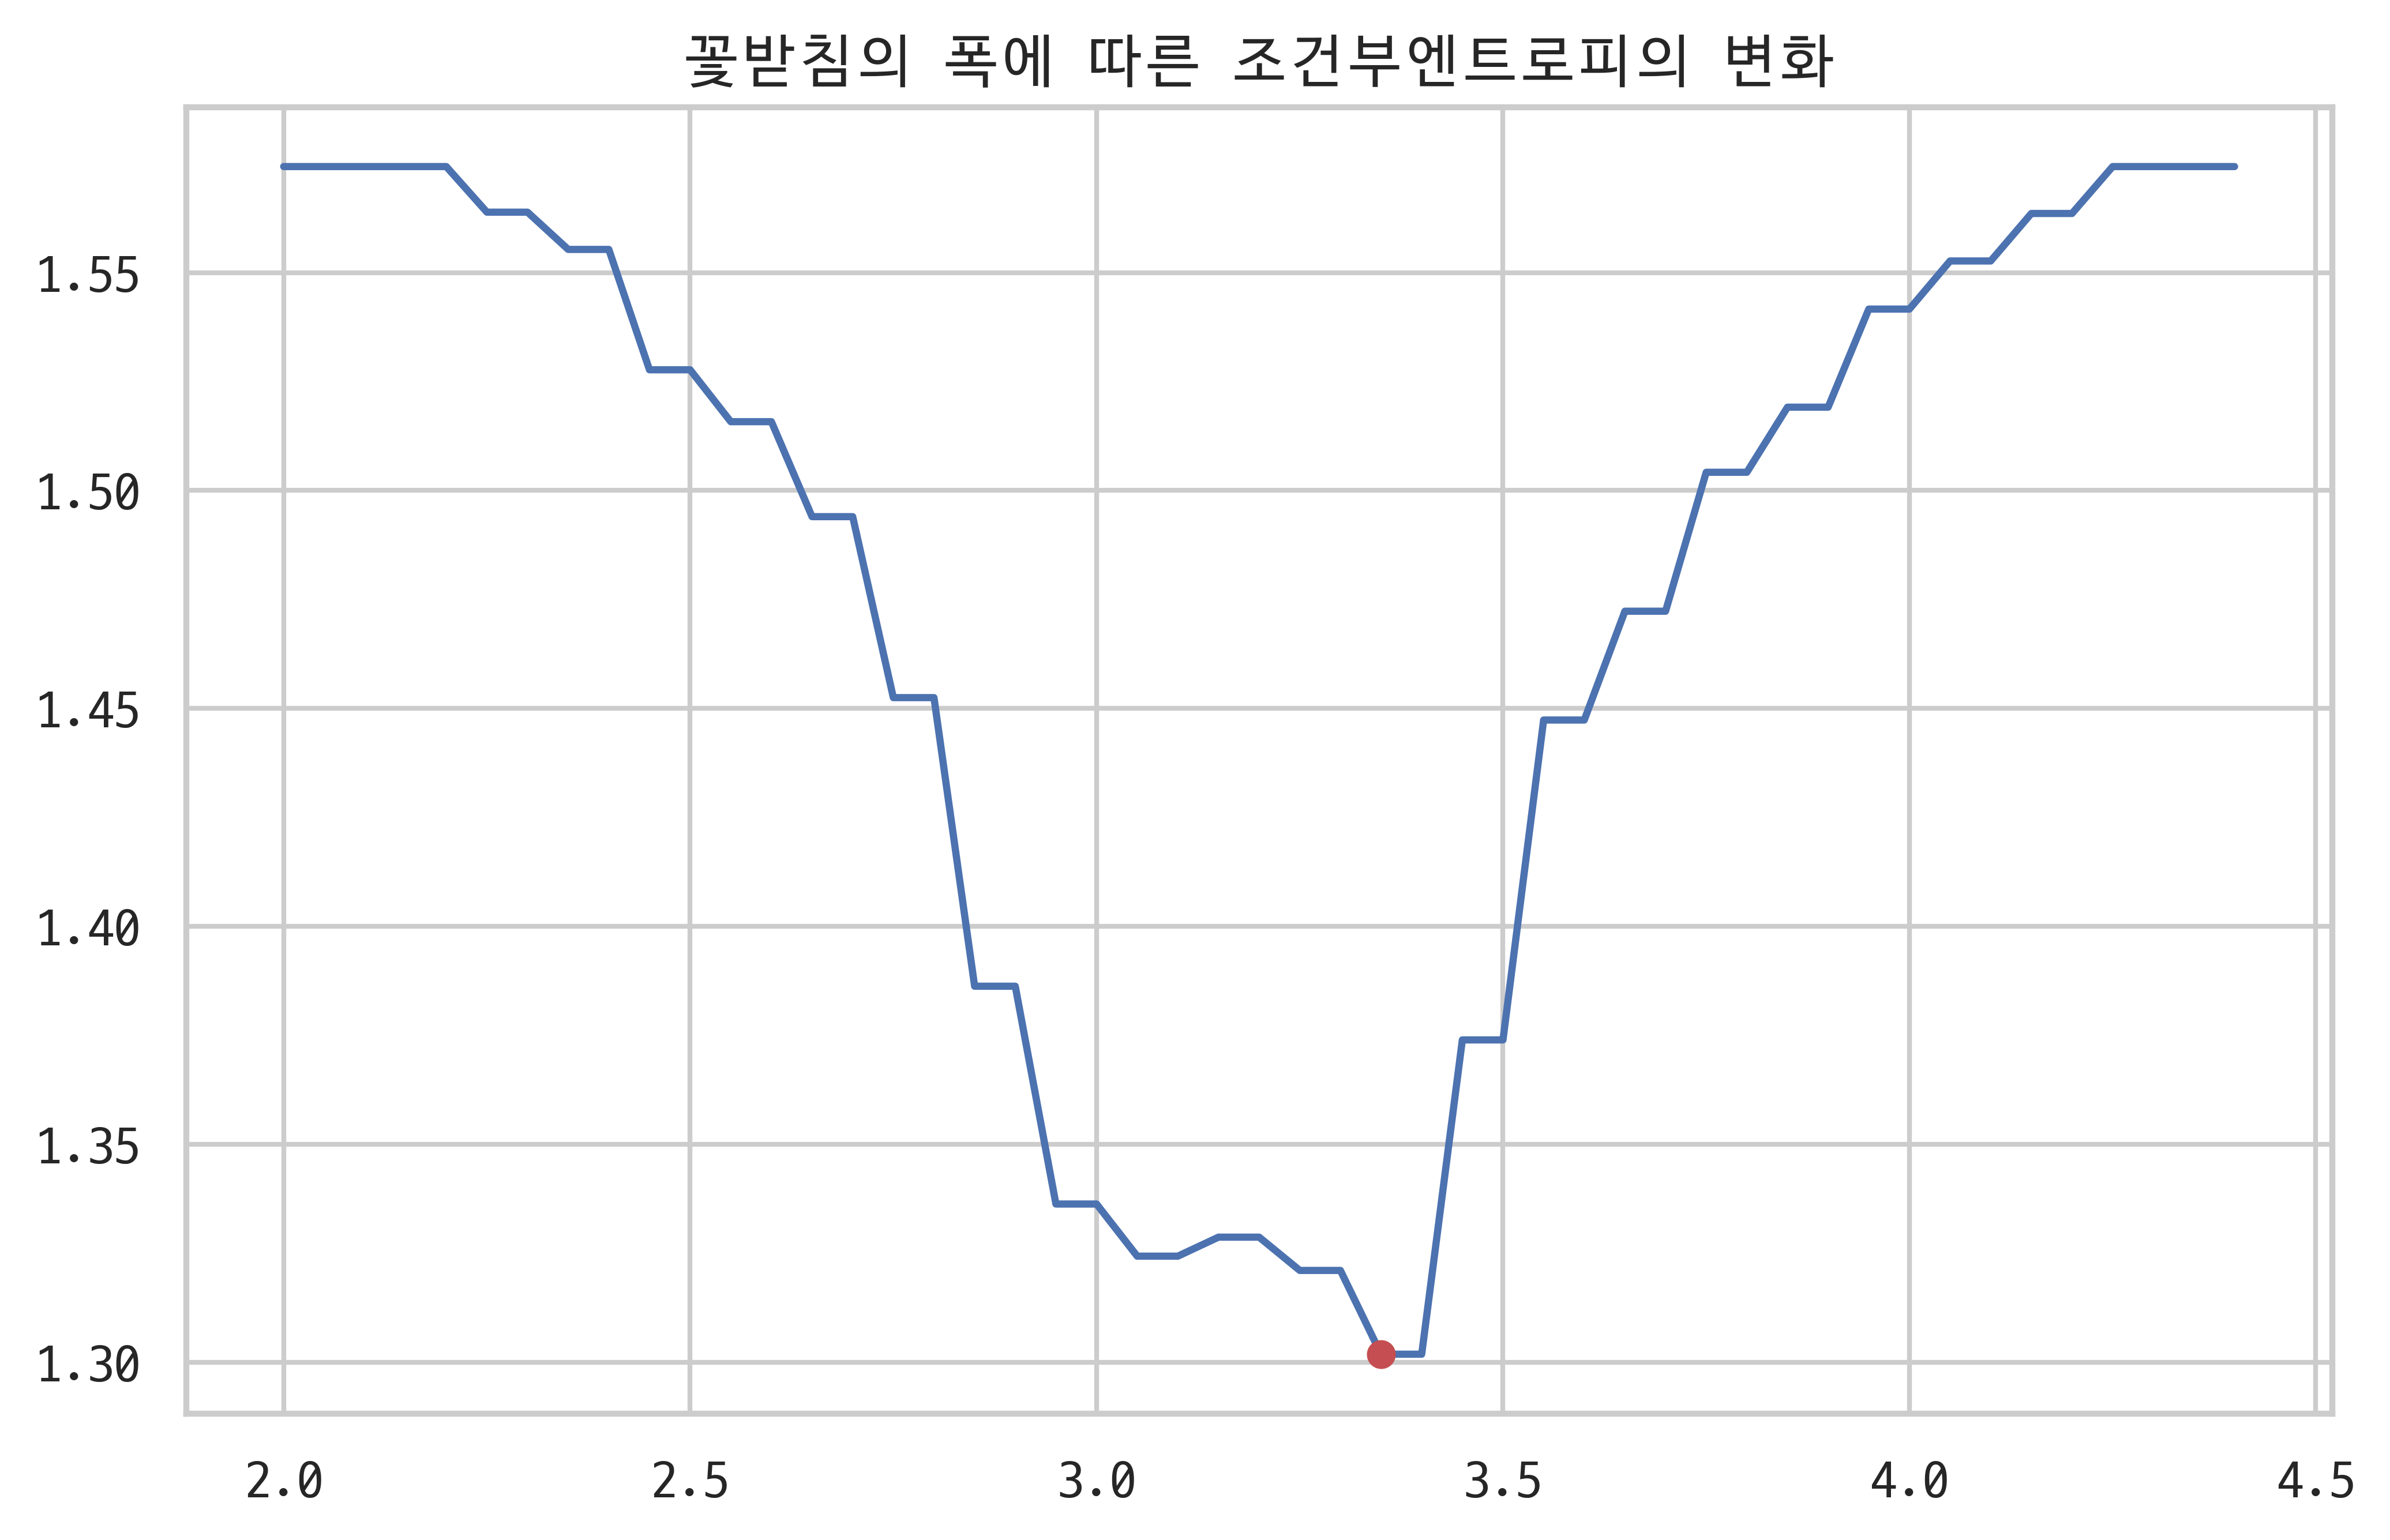

In [202]:
# (3)번 문제
sw_min_width, sw_max_width = min(df["sepal width (cm)"]), max(df["sepal width (cm)"])
sw_list = []
sw_entropy_list = []

for i, l in enumerate(np.arange(sw_min_width, sw_max_width, 0.05)):
    df["Y{}".format(i)] = df["sepal width (cm)"] > l
    entropy = cond_entropy(df.groupby(["Y{}".format(i), "species"]).size().unstack().fillna(0).values)
    sw_list.append(l)
    sw_entropy_list.append(entropy)

plt.plot(sw_list, sw_entropy_list, ls="-")
plt.plot(3.35, min(sw_entropy_list), 'ro', ms=5)
plt.title("꽃받침의 폭에 따른 조건부엔트로피의 변화")
plt.show()

In [200]:
min(sw_entropy_list)

1.3018365115523247

In [201]:
list(zip(sw_list, sw_entropy_list))
# answer: 3.35 cm

[(2.0, 1.574331388064963),
 (2.05, 1.574331388064963),
 (2.0999999999999996, 1.574331388064963),
 (2.1499999999999995, 1.574331388064963),
 (2.1999999999999993, 1.574331388064963),
 (2.249999999999999, 1.5638682014339245),
 (2.299999999999999, 1.5638682014339245),
 (2.3499999999999988, 1.5553184001467097),
 (2.3999999999999986, 1.5553184001467097),
 (2.4499999999999984, 1.5277068999197683),
 (2.4999999999999982, 1.5277068999197683),
 (2.549999999999998, 1.5157982194787427),
 (2.599999999999998, 1.5157982194787427),
 (2.6499999999999977, 1.4940065500503137),
 (2.6999999999999975, 1.4940065500503137),
 (2.7499999999999973, 1.4524823112716707),
 (2.799999999999997, 1.4524823112716707),
 (2.849999999999997, 1.3862656802795268),
 (2.899999999999997, 1.3862656802795268),
 (2.9499999999999966, 1.336296325775044),
 (2.9999999999999964, 1.336296325775044),
 (3.0499999999999963, 1.3243314053930995),
 (3.099999999999996, 1.3243314053930995),
 (3.149999999999996, 1.3286927433335742),
 (3.199999999

In [204]:
# (4)번 문제
min(min(sl_entropy_list), min(sw_entropy_list))
# answer: sepal length because it minimizes the value of entropy

1.0277298129142294